# Week 1
## Test your dog rating network

Once you have trained your dog rating network (and have weights saved to `model.pt`) you can test it in this code. 

Find some of your own dog pictures (from the internet or pictures you have taken yourself) and put them in the folder `test_doggos`. Change the variable `im_path` in the [load image cell](#load-image).

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.utils as vutils
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

from PIL import Image
from src.model import DogRatingNetwork

device = 'cpu'

#### Define image transforms

In [4]:
transform = transforms.Compose(
    [
        torchvision.transforms.Resize(64, antialias=True),
        torchvision.transforms.CenterCrop(64),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

#### Function for unnormalising dog rating

In [5]:
def get_dog_rating(model_pred):
    return (16 * model_pred)

#### Load pre-trained model

In [6]:
model = DogRatingNetwork()
model.to(device)
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

#### Load image 

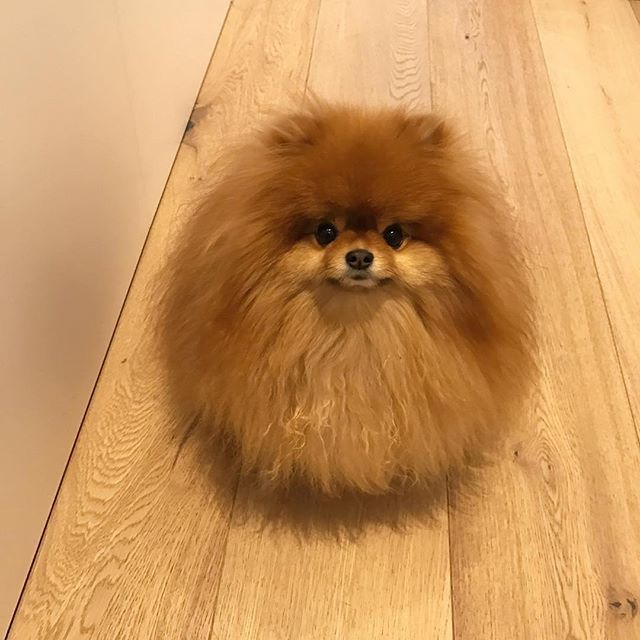

In [7]:
im_path = 'test_doggos/ceecee.jpg'
img = Image.open(im_path)
img

#### Get rating

In [10]:
torch_im = transform(img)
torch_im = torch_im.unsqueeze(0)
pred = model(torch_im)
rating = get_dog_rating(pred.item())
print(f'We give this doggo a rating of {rating:.2f}/10')

We give this doggo a rating of 11.23/10


#### Upload the picture you can find with the best rating to the Miro board! (link on moodle)